In [10]:
import pandas as pd 
import matplotlib.pyplot  as plt
import numpy as np 
import seaborn as sb

In [15]:
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
# Inspecting Data For Further Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# Replace Blank with 0 and total tenure is 0 and total charges are recorded
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
# Cheacking for any null values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
# Checking description of data for analysis
df.describe()
# max tenure is 72 months, 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
# checking dupalicate data 
df.duplicated().sum()

np.int64(0)

In [21]:
#  converting SeniorCitizen column value 0/1 to yes/no to make data easier to understand

def conv(Value):
    if Value == 1:
        return "Yes"
    else:
        return "No"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


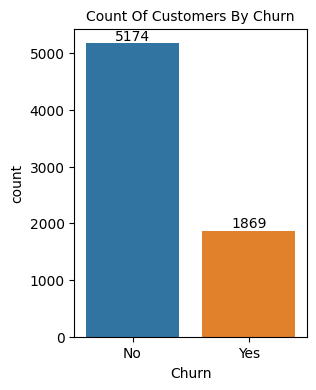

In [48]:
# understanding how many churned out
plt.figure(figsize=(3,4))
ax = sb.countplot(x = "Churn", data= df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count Of Customers By Churn", fontsize = 10)
plt.show()

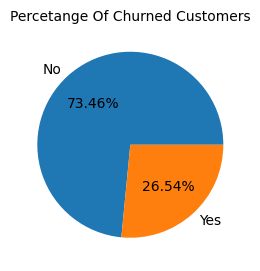

In [53]:
# Looking at churned out percentage
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"],labels= gb.index,autopct="%1.2f%%")
plt.title("Percetange Of Churned Customers", fontsize = 10)
plt.show()

In [ ]:
# From pie Chart we are able to see that our 26.54% customer have churned out
# let understand why have been they churned out 

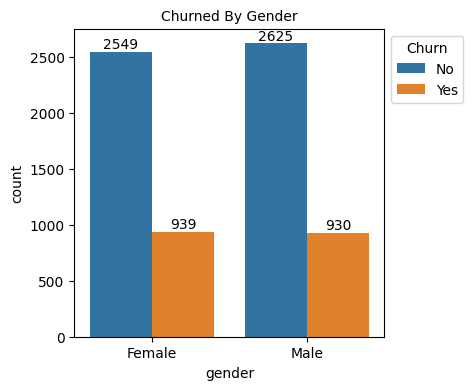

In [46]:
# now understand how many male/female customers we have
plt.figure(figsize=(4,4))
ax= sb.countplot(x = "gender", data= df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned By Gender", fontsize = 10)
plt.legend(title = "Churn", bbox_to_anchor  =(1,1))
plt.show()
# we can conclude that gender is not the reason for churning out 

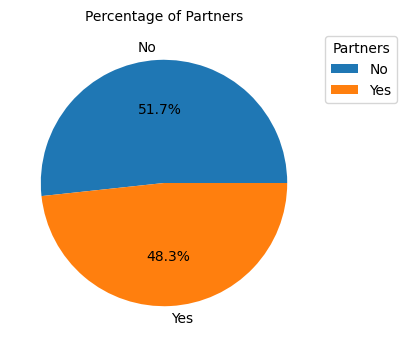

In [126]:
# lets See the churned out percentage of Partners:-
plt.figure(figsize=(4,4))
gb = df.groupby("Partner").agg({"Partner":"count"})
plt.pie(gb["Partner"],data=df,labels= gb.index,autopct="%1.1f%%")
plt.title("Percentage of Partners", fontsize = 10)
plt.legend(title = "Partners", bbox_to_anchor = (1,1))
plt.show()


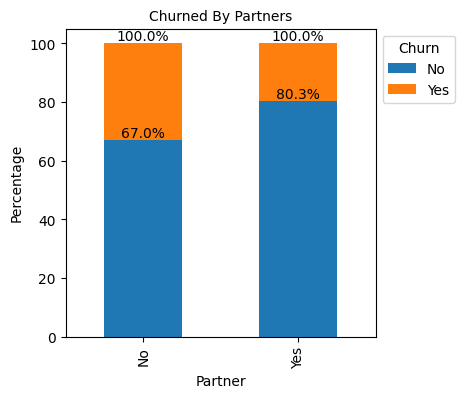

In [123]:
# let see how many of partners are churned out :-
# Calculate percentages
partner_counts = df.groupby(['Partner', 'Churn']).size().unstack()
partner_counts = partner_counts.div(partner_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
partner_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(4, 4))
plt.title("Churned By Partners", fontsize=10)
plt.xlabel("Partner")
plt.ylabel("Percentage")


# Add percentage labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%')
plt.legend(title = "Churn", bbox_to_anchor  =(1,1))
plt.show()

# larger Percentage of Customers form Partner category have been Churned

In [100]:
# lets see Stas. of Senior Citizen :- 
gb = df.groupby("SeniorCitizen").agg({"SeniorCitizen":"count"})
gb

,SeniorCitizen
SeniorCitizen,
No,7043


In [101]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


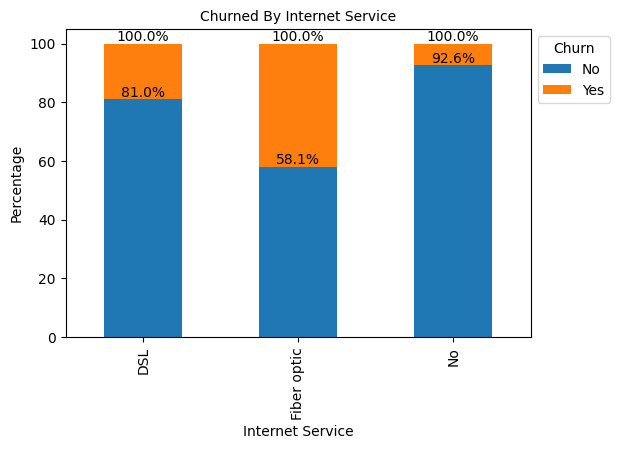

In [124]:
# # Lets dive into Internet Service type:- 
# Calculate percentages
service_counts = df.groupby(['InternetService', 'Churn']).size().unstack()
service_counts = service_counts.div(service_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = service_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(6, 4))
plt.title("Churned By Internet Service", fontsize=10)
plt.xlabel("Internet Service")
plt.ylabel("Percentage")

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.legend(title = "Churn", bbox_to_anchor = (1,1))
plt.show()


# Larger percentage of customer using internet service of DSL have been churned.

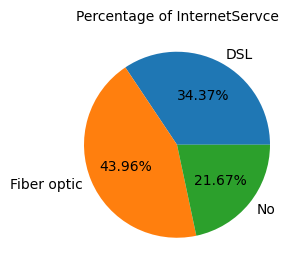

In [135]:
# Total Percentage of Internet Service :- 
plt.figure(figsize = (3,4))
gb = df.groupby("InternetService").agg({"InternetService":"count"})
plt.pie(gb.InternetService, labels= gb.index,autopct="%1.2f%%")
plt.title("Percentage of InternetServce", fontsize = 10)
plt.show()

# Largest Percentage of Internet Service Provider is Fiber Optic , but the churning rate is larger/ greate in DSL users.

In [128]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#  lets understand Churnign out rate by Tenure 

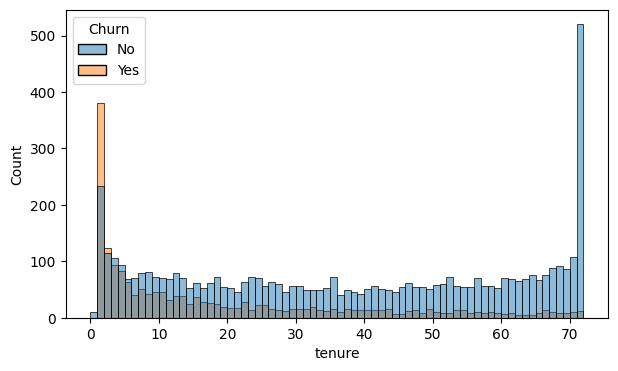

In [141]:
# Chrun By Tenure 
plt.figure(figsize=(7,4))
ax = sb.histplot(x = "tenure", data = df, hue = "Churn", bins = 72)
plt.show()

# Customres who have use our services long time have stayed and Customers who have use our services 1 or 2 months only they have churned.

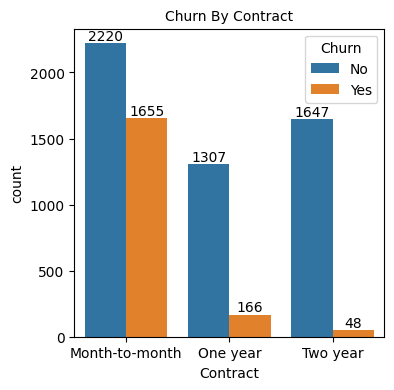

In [45]:
# Count Customer on there Contract Basis :- 
plt.figure(figsize = (4,4))
ax= sb.countplot(x = "Contract", data = df, hue ="Churn")
plt.title("Churn By Contract", fontsize = 10)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(title = "Churn", bbox_to_anchor = (1,1))

# Those Customer have been with contract of 1 or 2 year ,  rate of churning is low. but Customers who have month-to-month contract there churning rate is high.

In [152]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

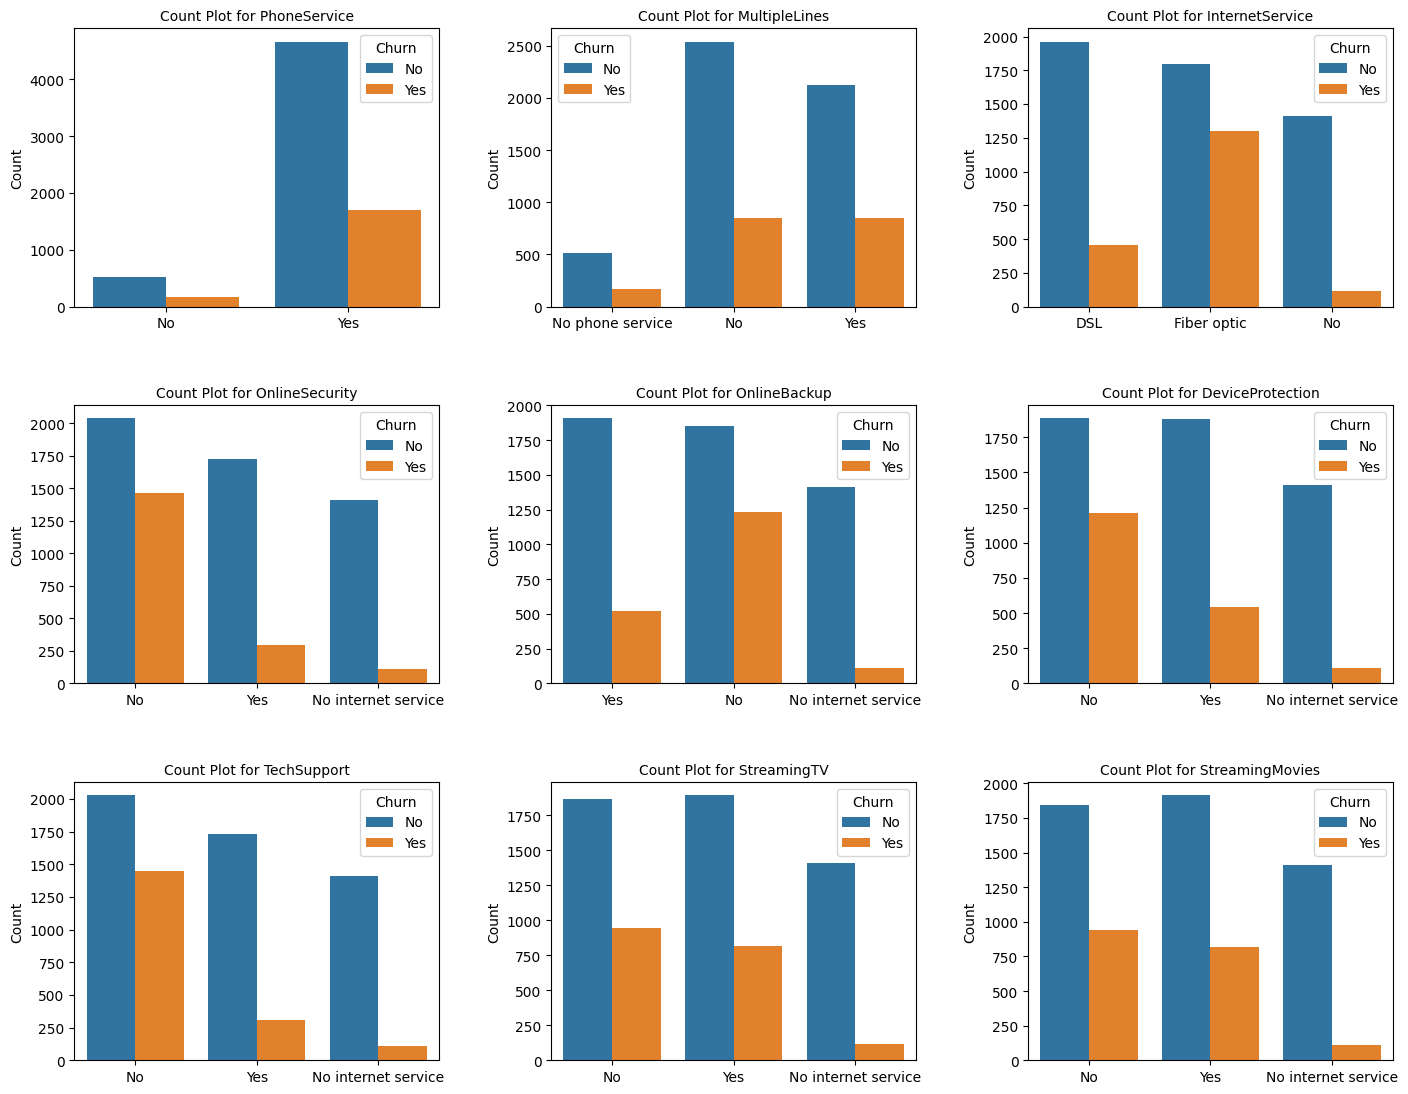

In [156]:
# List of columns to create subplots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.tight_layout(pad=5.0)

# Loop through each column and create a count plot
for i, col in enumerate(columns):
    row = i // 3
    col_index = i % 3
    ax = axes[row, col_index]
    sb.countplot(x=col, data=df, ax=ax, hue = df["Churn"])
    ax.set_title(f'Count Plot for {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.show()


# PhoneService: Most customers have phone service, with fewer churned customers among them.

# MultipleLines: Many customers with single phone lines are less likely to churn compared to those with multiple lines.

# InternetService: Fiber optic users have a higher churn rate than DSL users, while customers with no internet service have the lowest churn.

# OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Churn is higher among customers without these additional services, indicating they may contribute to customer retention.

# StreamingTV and StreamingMovies: Customers with streaming services tend to have slightly higher churn rates, but the effect is less pronounced than for security and backup services.

In [23]:
import pandas as pd
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

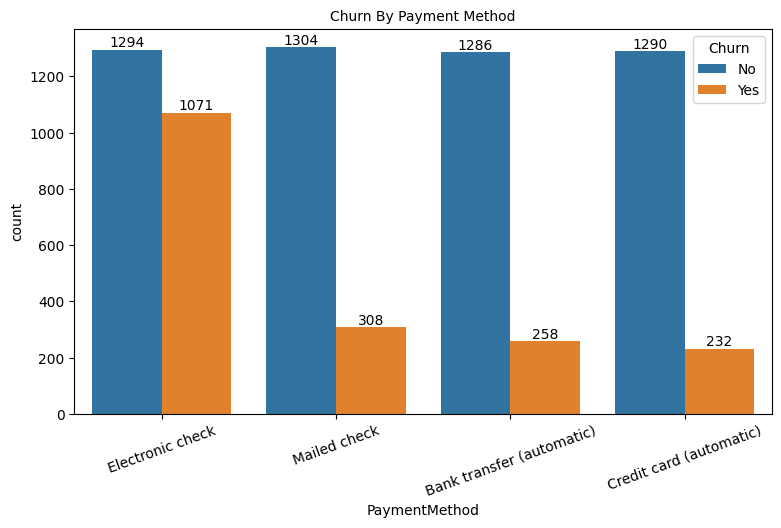

In [53]:
plt.figure(figsize = (9,5))
ax = sb.countplot(x = "PaymentMethod", data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn By Payment Method", fontsize = 10)
plt.xticks(rotation = 20)

As we can understand that from payment Method :-
1. Electronic Check: This method has the highest churn rate, with a significant portion of customers choosing to leave.
2. Mailed Check: The churn rate is moderate, though still notable.
3. Bank Transfer (Automatic) and Credit Card (Automatic): These methods have the lowest churn rates, indicating customers using automatic payments tend to stay with the service.